# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the ONS dataset
ons_data = pd.read_csv("..\data\ONS\ons_filtered.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\becca\AppData\Local\Temp\ipykernel_5060\693643881.py:2: SyntaxWarning: invalid escape sequence '\d'
  ons_data = pd.read_csv("..\data\ONS\ons_filtered.csv")


In [3]:
ons_data.head()

,Unnamed: 0,Year Quarter,Gross Domestic Product (£m),Unemployment Rate (%),CPIH (%),Household Final Consumption Expenditure (£m)
0,0,2009 Q1,509646.0,7.1,2.9,312387.0
1,1,2009 Q2,508009.0,7.8,2.0,311964.0
2,2,2009 Q3,508398.0,7.8,1.4,313410.0
3,3,2009 Q4,509889.0,7.8,1.6,315889.0
4,4,2010 Q1,514595.0,8.0,2.4,314367.0


In [4]:
# Load spotify dataset (genre groups)
spotify_data = pd.read_csv("..\data\ons_genre_including_genregroup_new.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\becca\AppData\Local\Temp\ipykernel_5060\226824561.py:2: SyntaxWarning: invalid escape sequence '\d'
  spotify_data = pd.read_csv("..\data\ons_genre_including_genregroup_new.csv")


In [5]:
spotify_data.head()

,year_quarter,genre,Genre_Group,streams,gdp_(£m),inflation_(%),hfce_(£m),unemployment_rate_(%)
0,2016 Q4,R&B,R&B,2414608.0,589476.0,1.5,369850.0,4.7
1,2016 Q4,Pop,Pop,2406621.0,589476.0,1.5,369850.0,4.7
2,2016 Q4,Pop,Pop,2345002.0,589476.0,1.5,369850.0,4.7
3,2016 Q4,Rock,Rock/Punk/Metal,1879767.0,589476.0,1.5,369850.0,4.7
4,2016 Q4,R&B,R&B,1797034.0,589476.0,1.5,369850.0,4.7


In [6]:
# Define the measure columns
cols = [
    'Gross Domestic Product (£m)', 
    'Unemployment Rate (%)', 
    'CPIH (%)', 
    'Household Final Consumption Expenditure (£m)'
]

In [7]:
# Create a copy to add normalized values without altering original data
ons_norm = ons_data.copy()

In [8]:
# Normalize each measure using min-max scaling
for col in cols:
    ons_norm[col + '_norm'] = (ons_norm[col] - ons_norm[col].min()) / (ons_norm[col].max() - ons_norm[col].min())

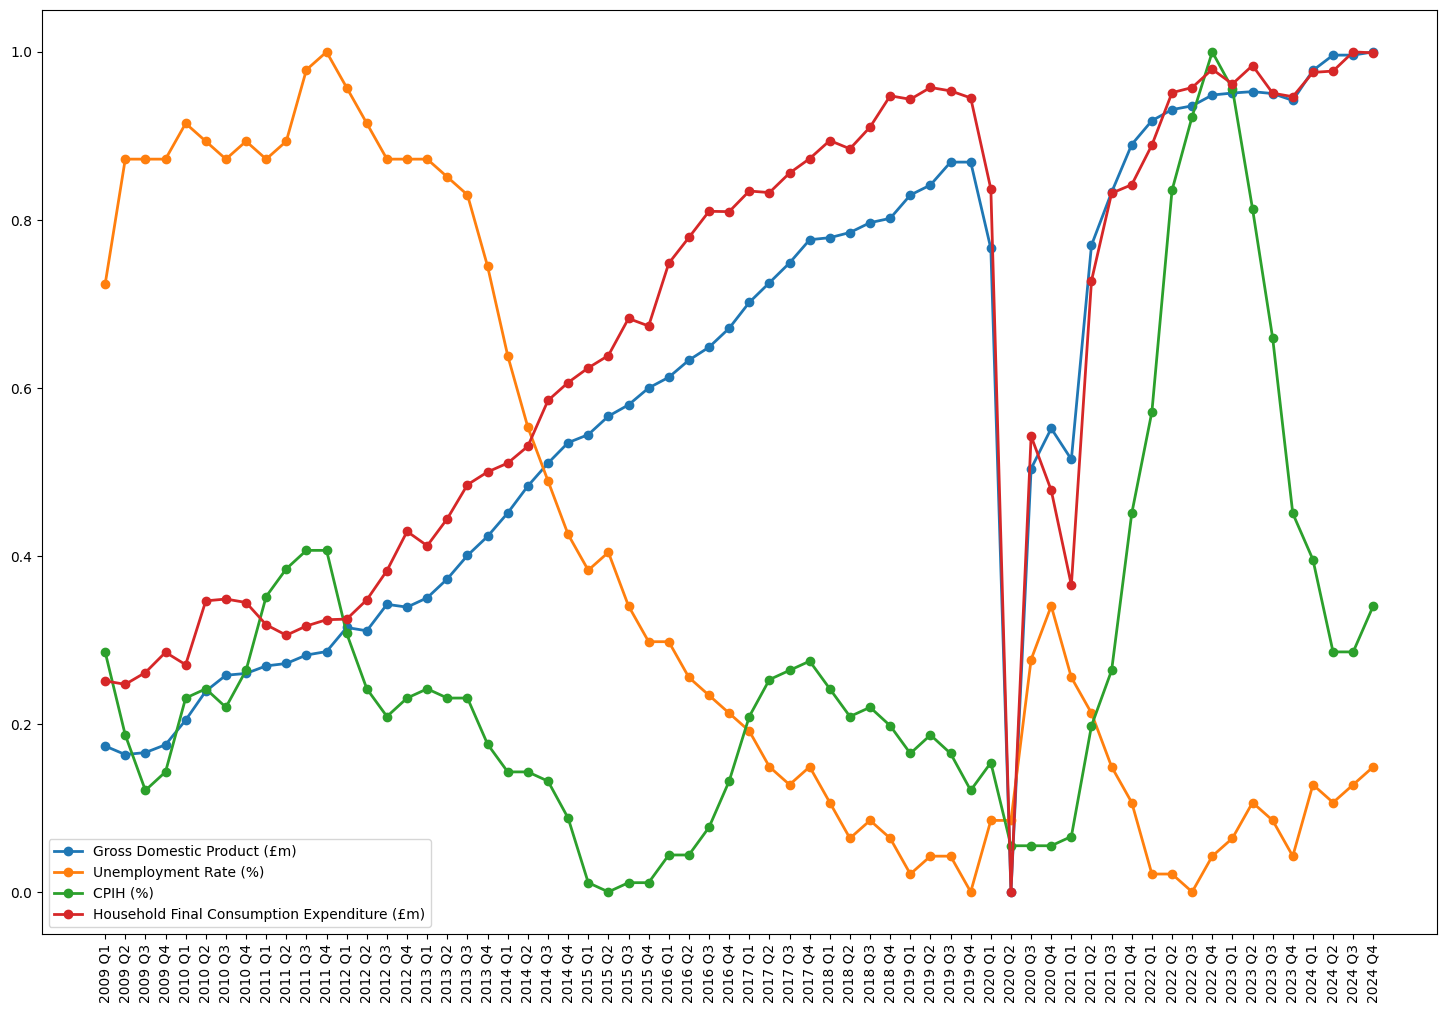

In [9]:
# Set the figure size for better readability
plt.figure(figsize=(18, 12))
# Plot each normalized measure against 'Year Quarter'
for col in cols:
    plt.plot(ons_norm['Year Quarter'], ons_norm[col + '_norm'], marker='o', linewidth=2, label=col)
    # Rotate the x-axis labels by 90 degrees
    plt.xticks(rotation=90)
    # Show the legend
    plt.legend()


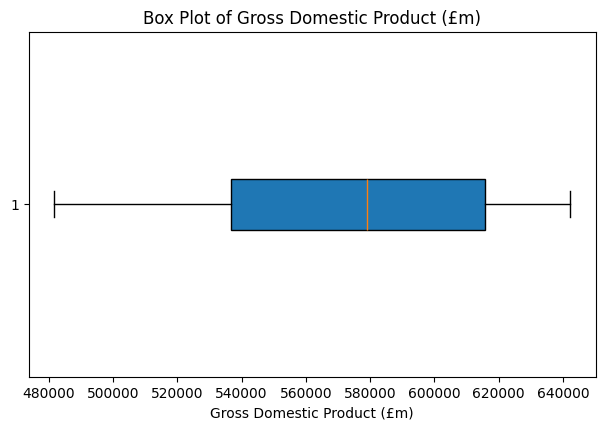

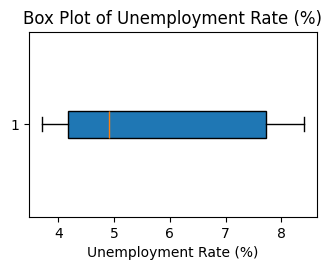

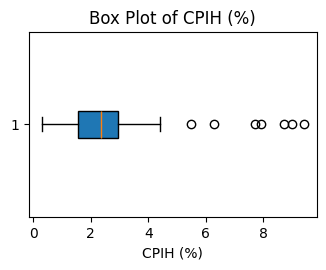

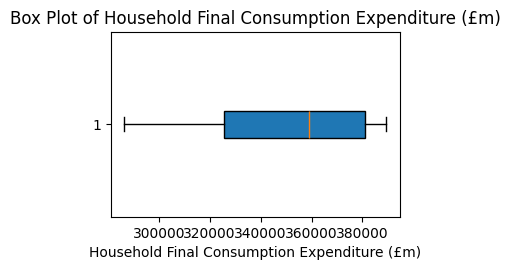

In [10]:
# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)  # Adjust grid size based on number of columns
    plt.boxplot(ons_data[col].dropna(), vert=False, patch_artist=True)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.005378      -0.038560   0.002973   
gdp_(£m)              -0.005378  1.000000       0.586095   0.945377   
inflation_(%)         -0.038560  0.586095       1.000000   0.492880   
hfce_(£m)              0.002973  0.945377       0.492880   1.000000   
unemployment_rate_(%) -0.006341 -0.410130      -0.347710  -0.519177   

                       unemployment_rate_(%)  
streams                            -0.006341  
gdp_(£m)                           -0.410130  
inflation_(%)                      -0.347710  
hfce_(£m)                          -0.519177  
unemployment_rate_(%)               1.000000  


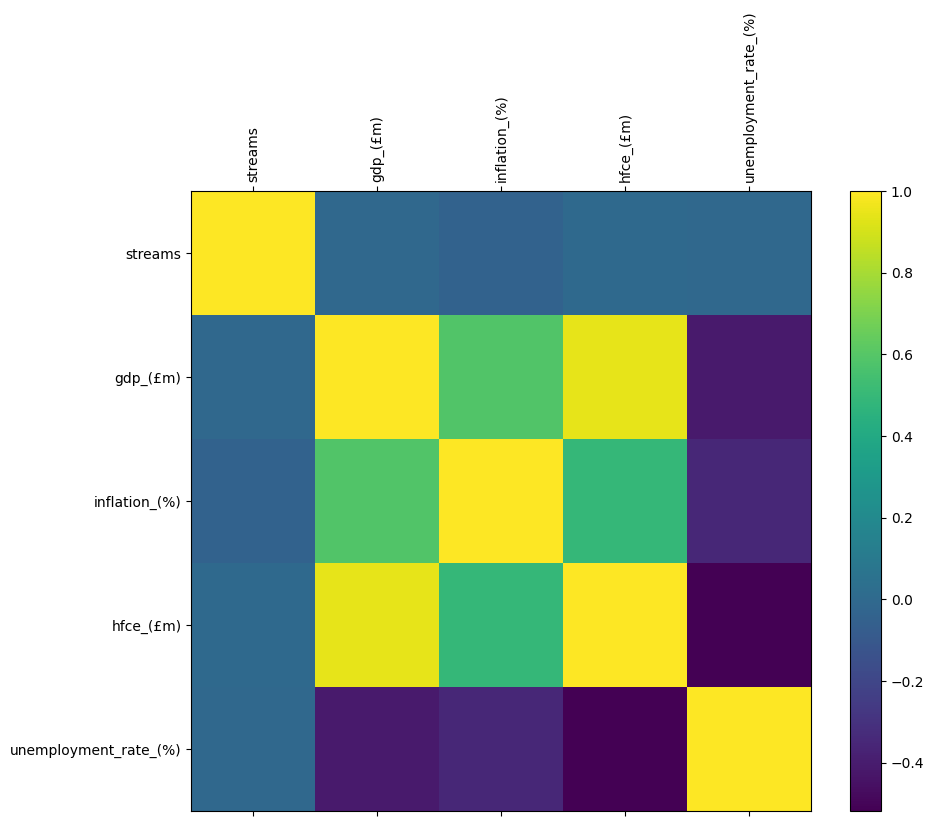

In [11]:
###Correlation calculation for detailed spotify genres


# Drop non-numeric columns to avoid conversion errors
spotify_numeric_detailgenre = spotify_data.drop(columns=['year_quarter', 'Genre_Group', 'genre'])

# Calculate the correlation matrix
correlation_matrix_detailgenre = spotify_numeric_detailgenre.corr()

# Print the correlation matrix
print(correlation_matrix_detailgenre)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix_detailgenre, fignum=1)
plt.xticks(range(len(correlation_matrix_detailgenre.columns)), correlation_matrix_detailgenre.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_detailgenre.columns)), correlation_matrix_detailgenre.columns)
plt.colorbar()
plt.show()

In [12]:
#Drop genre data
spotify_data.drop(columns=['genre'], inplace=True) # changed ['genre'] to columns=['genre']

# Print the first few rows of the dataframe to verify
spotify_data.head(5)


,year_quarter,Genre_Group,streams,gdp_(£m),inflation_(%),hfce_(£m),unemployment_rate_(%)
0,2016 Q4,R&B,2414608.0,589476.0,1.5,369850.0,4.7
1,2016 Q4,Pop,2406621.0,589476.0,1.5,369850.0,4.7
2,2016 Q4,Pop,2345002.0,589476.0,1.5,369850.0,4.7
3,2016 Q4,Rock/Punk/Metal,1879767.0,589476.0,1.5,369850.0,4.7
4,2016 Q4,R&B,1797034.0,589476.0,1.5,369850.0,4.7


In [13]:
#Group by year_quarter and genre group
grouped_spotify = spotify_data.groupby(['year_quarter', 'Genre_Group', 'gdp_(£m)', 'inflation_(%)','hfce_(£m)', 'unemployment_rate_(%)'])['streams'].sum().reset_index()
grouped_spotify.head(5)

,year_quarter,Genre_Group,gdp_(£m),inflation_(%),hfce_(£m),unemployment_rate_(%),streams
0,2016 Q4,Christmas,589476.0,1.5,369850.0,4.7,19182659.0
1,2016 Q4,Dance/House,589476.0,1.5,369850.0,4.7,10253538.0
2,2016 Q4,Disco,589476.0,1.5,369850.0,4.7,1033984.0
3,2016 Q4,Electronic,589476.0,1.5,369850.0,4.7,7981704.0
4,2016 Q4,Folk,589476.0,1.5,369850.0,4.7,281777.0


                       gdp_(£m)  inflation_(%)  hfce_(£m)  \
gdp_(£m)               1.000000       0.591437   0.947409   
inflation_(%)          0.591437       1.000000   0.507096   
hfce_(£m)              0.947409       0.507096   1.000000   
unemployment_rate_(%) -0.387038      -0.380389  -0.480104   
streams                0.026961      -0.013197   0.023556   

                       unemployment_rate_(%)   streams  
gdp_(£m)                           -0.387038  0.026961  
inflation_(%)                      -0.380389 -0.013197  
hfce_(£m)                          -0.480104  0.023556  
unemployment_rate_(%)               1.000000 -0.029165  
streams                            -0.029165  1.000000  


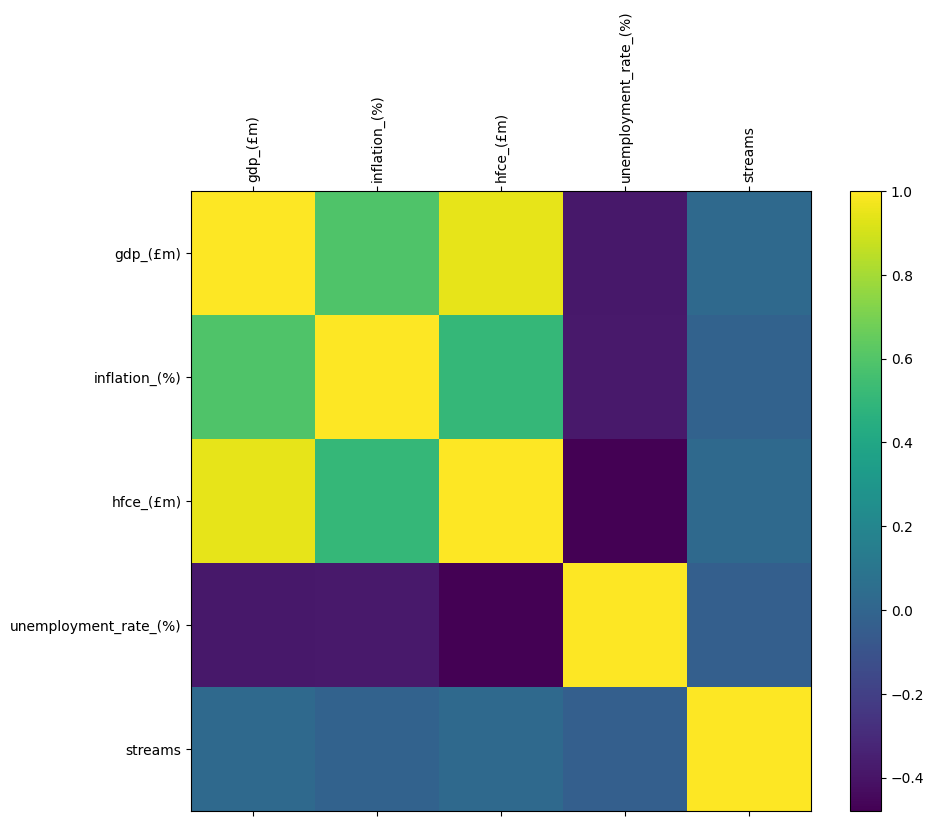

In [14]:
###Correlation calculation spotify genre groups

# Drop non-numeric columns to avoid conversion errors
spotify_numeric = grouped_spotify.drop(columns=['year_quarter', 'Genre_Group'])

# Calculate the correlation matrix
correlation_matrix = spotify_numeric.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


When looking at a correlation matrix of Spotify genre streams and economic measure, there are no significant correlations between the Spotify genres and the economic data. 

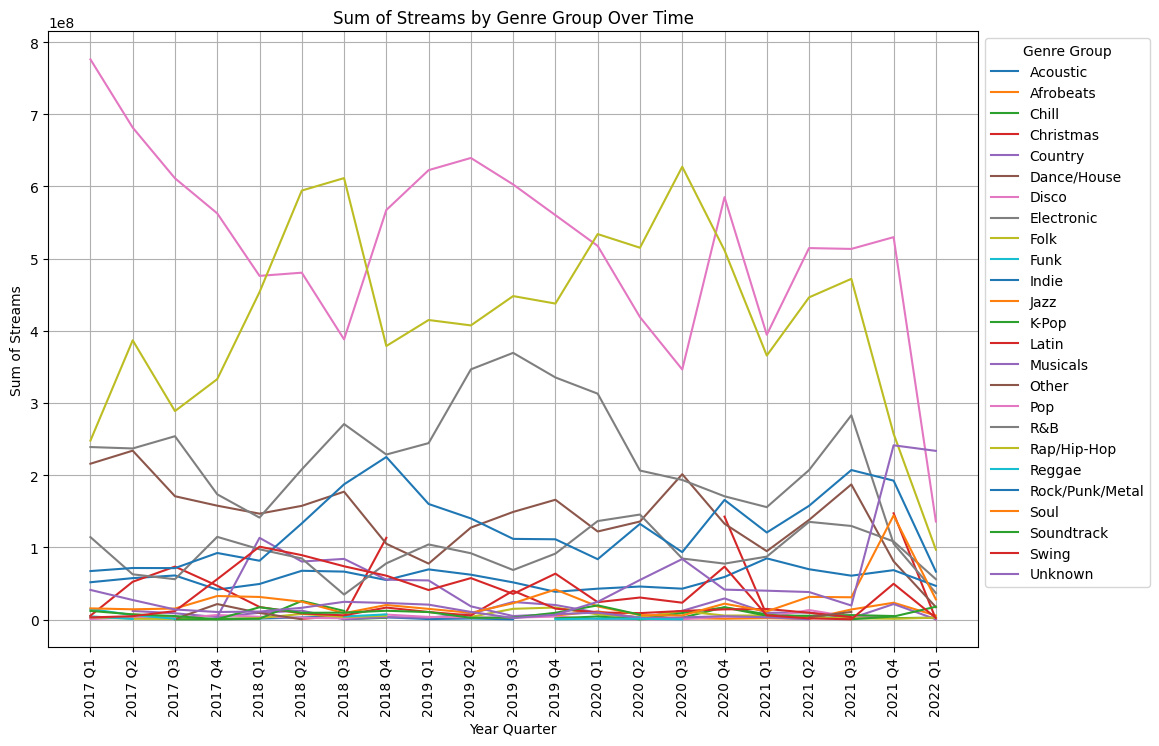

In [15]:
###Time Series Analysis

# Remove non-printable characters from column names
spotify_data.columns = spotify_data.columns.str.replace('\u00A0', '')

# Exclude data from 2016 Q4
spotify_data_filtered = spotify_data[spotify_data['year_quarter'] != '2016 Q4']

# Group by year_quarter and Genre_Group, then sum the streams to handle duplicates
spotify_data_grouped = spotify_data_filtered.groupby(['year_quarter', 'Genre_Group'])['streams'].sum().reset_index()

# Pivot the table to have Genre_Group as columns and year_quarter as rows
spotify_data_pivot = spotify_data_grouped.pivot(index='year_quarter', columns='Genre_Group', values='streams')

# Plot the time series visual
plt.figure(figsize=(12, 8))
for genre in spotify_data_pivot.columns:
    plt.plot(spotify_data_pivot.index, spotify_data_pivot[genre], label=genre)

plt.xlabel('Year Quarter')
plt.ylabel('Sum of Streams')
plt.title('Sum of Streams by Genre Group Over Time')
plt.legend(title='Genre Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


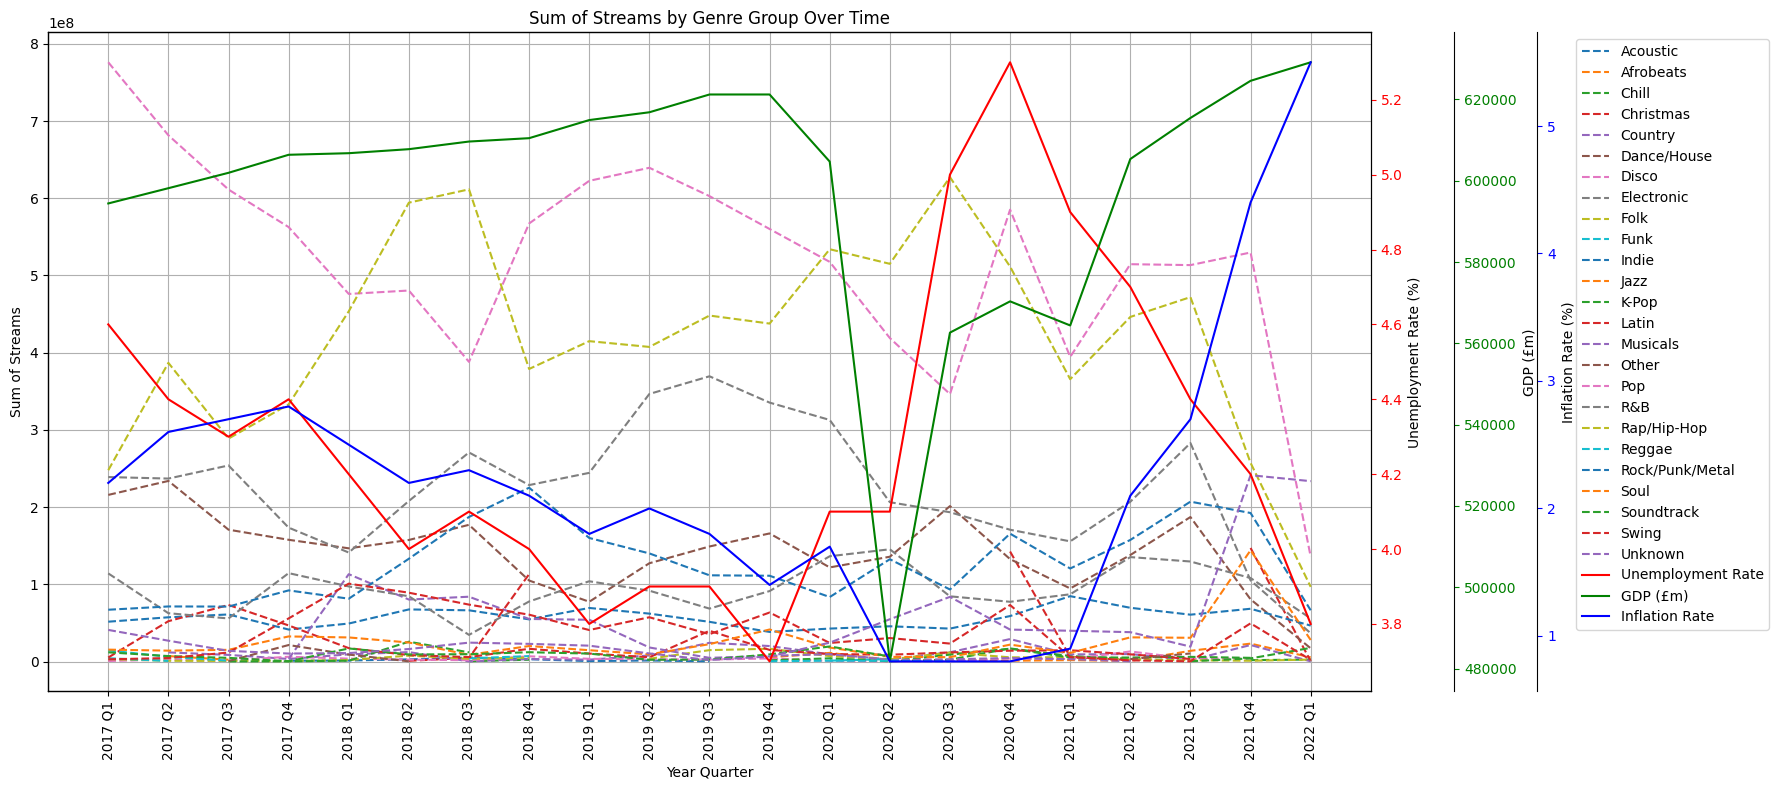

In [16]:
###Time series including economic measures


# Plot the time series visual
fig, ax1 = plt.subplots(figsize=(18, 8))  # Increase the width to 18 inches

for genre in spotify_data_pivot.columns:
    ax1.plot(spotify_data_pivot.index, spotify_data_pivot[genre], linestyle='--', label=genre)  # Make lines dashed

ax1.set_xlabel('Year Quarter')
ax1.set_ylabel('Sum of Streams')
ax1.set_title('Sum of Streams by Genre Group Over Time')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(True)

# Add additional y-axes for unemployment, gdp, and inflation
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Offset the right spine of ax3 and ax4
ax3.spines['right'].set_position(('outward', 60))
ax4.spines['right'].set_position(('outward', 120))

# Plot unemployment rate on ax2
ax2.plot(spotify_data_filtered['year_quarter'].unique(), spotify_data_filtered.groupby('year_quarter')['unemployment_rate_(%)'].mean(), color='red', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)')
ax2.tick_params(axis='y', colors='red')

# Plot GDP on ax3
ax3.plot(spotify_data_filtered['year_quarter'].unique(), spotify_data_filtered.groupby('year_quarter')['gdp_(£m)'].mean(), color='green', label='GDP (£m)')
ax3.set_ylabel('GDP (£m)')
ax3.tick_params(axis='y', colors='green')

# Plot inflation rate on ax4
ax4.plot(spotify_data_filtered['year_quarter'].unique(), spotify_data_filtered.groupby('year_quarter')['inflation_(%)'].mean(), color='blue', label='Inflation Rate')
ax4.set_ylabel('Inflation Rate (%)')
ax4.tick_params(axis='y', colors='blue')

# Combine all legends into one and place it next to the additional y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()

ax4.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='upper left', bbox_to_anchor=(1.15, 1))

fig.tight_layout()
plt.show()


When looking closely at the time series analysis, it looks like the trend of some of the genre lines follow the economic trends. 

Correlation matrix for R&B:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.096990      -0.058268  -0.097587   
gdp_(£m)              -0.096990  1.000000       0.580435   0.943140   
inflation_(%)         -0.058268  0.580435       1.000000   0.471230   
hfce_(£m)             -0.097587  0.943140       0.471230   1.000000   
unemployment_rate_(%)  0.036163 -0.404467      -0.349600  -0.497850   

                       unemployment_rate_(%)  
streams                             0.036163  
gdp_(£m)                           -0.404467  
inflation_(%)                      -0.349600  
hfce_(£m)                          -0.497850  
unemployment_rate_(%)               1.000000  


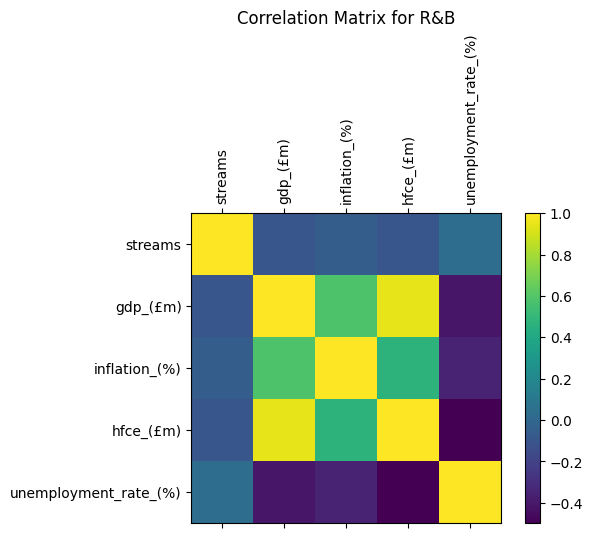

Correlation matrix for Pop:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.004584      -0.046201   0.005367   
gdp_(£m)              -0.004584  1.000000       0.576576   0.939323   
inflation_(%)         -0.046201  0.576576       1.000000   0.487181   
hfce_(£m)              0.005367  0.939323       0.487181   1.000000   
unemployment_rate_(%) -0.016199 -0.436291      -0.330503  -0.541443   

                       unemployment_rate_(%)  
streams                            -0.016199  
gdp_(£m)                           -0.436291  
inflation_(%)                      -0.330503  
hfce_(£m)                          -0.541443  
unemployment_rate_(%)               1.000000  


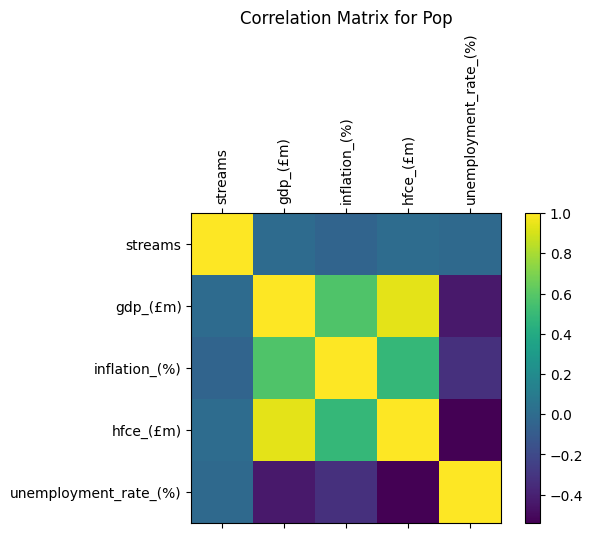

Correlation matrix for Rock/Punk/Metal:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.020255      -0.050145  -0.039009   
gdp_(£m)              -0.020255  1.000000       0.581637   0.939477   
inflation_(%)         -0.050145  0.581637       1.000000   0.481591   
hfce_(£m)             -0.039009  0.939477       0.481591   1.000000   
unemployment_rate_(%) -0.012830 -0.412251      -0.344145  -0.534257   

                       unemployment_rate_(%)  
streams                            -0.012830  
gdp_(£m)                           -0.412251  
inflation_(%)                      -0.344145  
hfce_(£m)                          -0.534257  
unemployment_rate_(%)               1.000000  


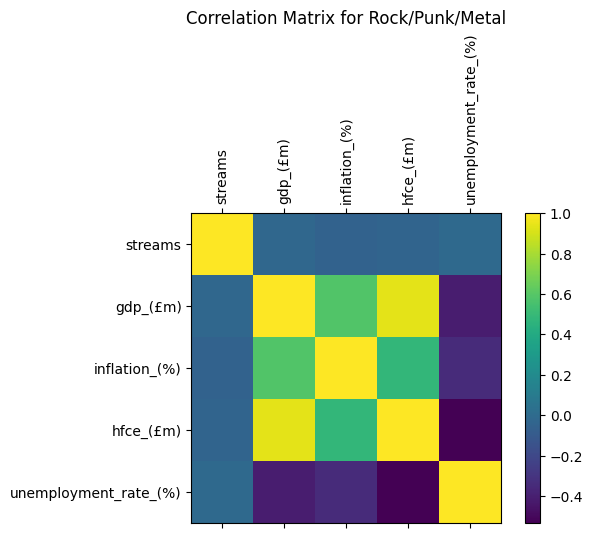

Correlation matrix for Christmas:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.053913       0.079174  -0.074273   
gdp_(£m)               0.053913  1.000000       0.689849   0.863339   
inflation_(%)          0.079174  0.689849       1.000000   0.428964   
hfce_(£m)             -0.074273  0.863339       0.428964   1.000000   
unemployment_rate_(%) -0.013971 -0.921836      -0.387801  -0.928086   

                       unemployment_rate_(%)  
streams                            -0.013971  
gdp_(£m)                           -0.921836  
inflation_(%)                      -0.387801  
hfce_(£m)                          -0.928086  
unemployment_rate_(%)               1.000000  


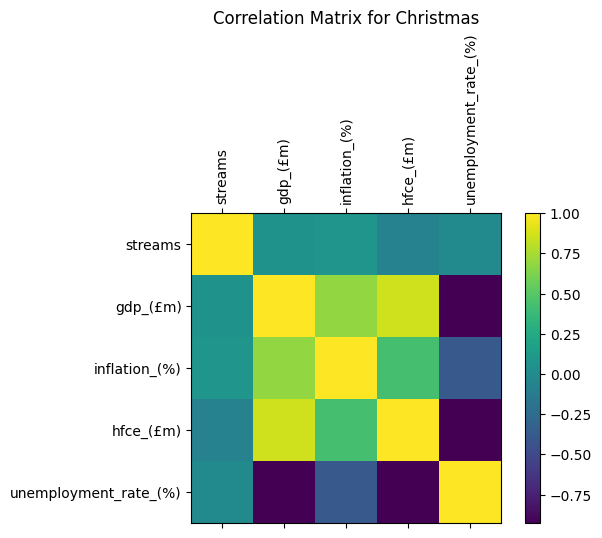

Correlation matrix for Dance/House:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.001576      -0.086137  -0.001281   
gdp_(£m)              -0.001576  1.000000       0.620099   0.952014   
inflation_(%)         -0.086137  0.620099       1.000000   0.555536   
hfce_(£m)             -0.001281  0.952014       0.555536   1.000000   
unemployment_rate_(%)  0.044643 -0.337951      -0.325619  -0.440782   

                       unemployment_rate_(%)  
streams                             0.044643  
gdp_(£m)                           -0.337951  
inflation_(%)                      -0.325619  
hfce_(£m)                          -0.440782  
unemployment_rate_(%)               1.000000  


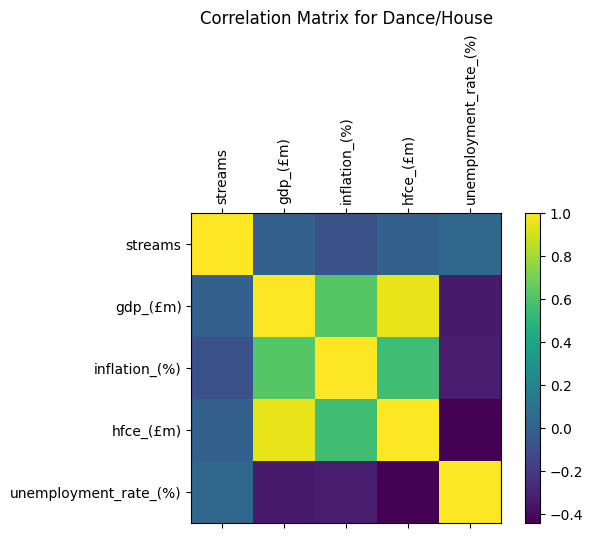

Correlation matrix for Rap/Hip-Hop:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.007275      -0.015527   0.022417   
gdp_(£m)               0.007275  1.000000       0.615687   0.959044   
inflation_(%)         -0.015527  0.615687       1.000000   0.576069   
hfce_(£m)              0.022417  0.959044       0.576069   1.000000   
unemployment_rate_(%) -0.006992 -0.351333      -0.368025  -0.482056   

                       unemployment_rate_(%)  
streams                            -0.006992  
gdp_(£m)                           -0.351333  
inflation_(%)                      -0.368025  
hfce_(£m)                          -0.482056  
unemployment_rate_(%)               1.000000  


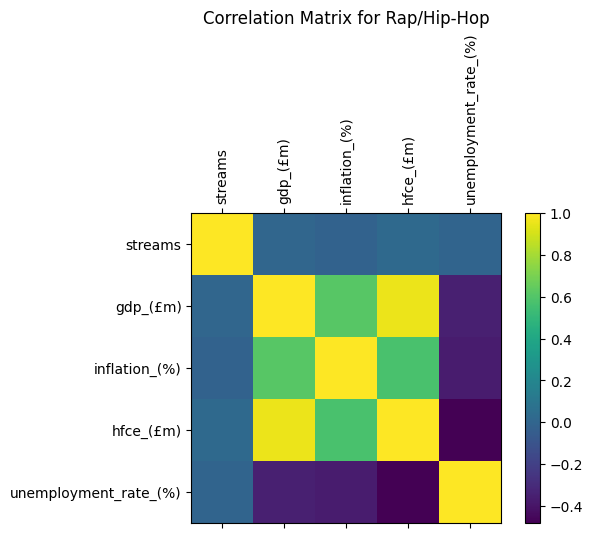

Correlation matrix for Swing:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.015955       0.018765  -0.024456   
gdp_(£m)              -0.015955  1.000000       0.536309   0.951883   
inflation_(%)          0.018765  0.536309       1.000000   0.466238   
hfce_(£m)             -0.024456  0.951883       0.466238   1.000000   
unemployment_rate_(%) -0.015466 -0.476168      -0.276218  -0.579212   

                       unemployment_rate_(%)  
streams                            -0.015466  
gdp_(£m)                           -0.476168  
inflation_(%)                      -0.276218  
hfce_(£m)                          -0.579212  
unemployment_rate_(%)               1.000000  


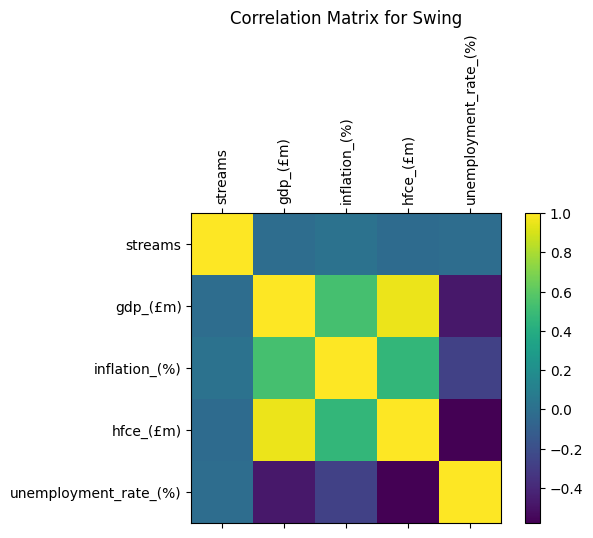

Correlation matrix for Electronic:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.010333      -0.018062   0.012563   
gdp_(£m)               0.010333  1.000000       0.535074   0.957185   
inflation_(%)         -0.018062  0.535074       1.000000   0.494129   
hfce_(£m)              0.012563  0.957185       0.494129   1.000000   
unemployment_rate_(%) -0.024962 -0.416399      -0.226449  -0.512465   

                       unemployment_rate_(%)  
streams                            -0.024962  
gdp_(£m)                           -0.416399  
inflation_(%)                      -0.226449  
hfce_(£m)                          -0.512465  
unemployment_rate_(%)               1.000000  


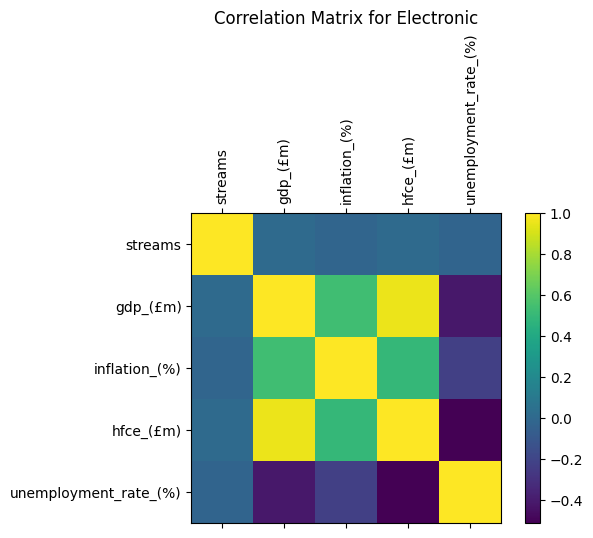

Correlation matrix for Indie:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.021667      -0.001758  -0.008857   
gdp_(£m)               0.021667  1.000000       0.584703   0.947574   
inflation_(%)         -0.001758  0.584703       1.000000   0.491649   
hfce_(£m)             -0.008857  0.947574       0.491649   1.000000   
unemployment_rate_(%)  0.119750 -0.406742      -0.361962  -0.521226   

                       unemployment_rate_(%)  
streams                             0.119750  
gdp_(£m)                           -0.406742  
inflation_(%)                      -0.361962  
hfce_(£m)                          -0.521226  
unemployment_rate_(%)               1.000000  


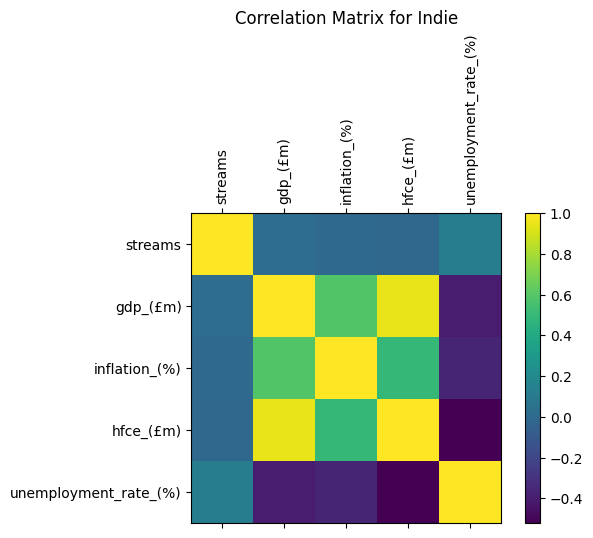

Correlation matrix for Disco:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.217259       0.097125   0.206021   
gdp_(£m)               0.217259  1.000000       0.622597   0.928460   
inflation_(%)          0.097125  0.622597       1.000000   0.551521   
hfce_(£m)              0.206021  0.928460       0.551521   1.000000   
unemployment_rate_(%) -0.137535 -0.432129      -0.344875  -0.595687   

                       unemployment_rate_(%)  
streams                            -0.137535  
gdp_(£m)                           -0.432129  
inflation_(%)                      -0.344875  
hfce_(£m)                          -0.595687  
unemployment_rate_(%)               1.000000  


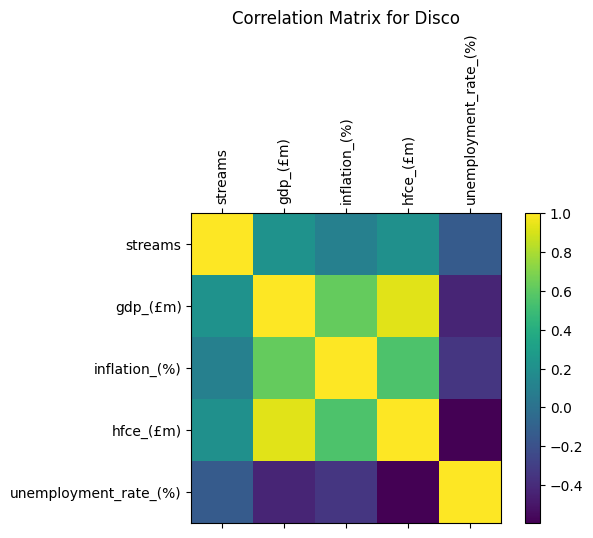

Correlation matrix for Unknown:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.186512      -0.079067  -0.237128   
gdp_(£m)              -0.186512  1.000000       0.752510   0.908149   
inflation_(%)         -0.079067  0.752510       1.000000   0.533767   
hfce_(£m)             -0.237128  0.908149       0.533767   1.000000   
unemployment_rate_(%)  0.102485 -0.541642      -0.683688  -0.522744   

                       unemployment_rate_(%)  
streams                             0.102485  
gdp_(£m)                           -0.541642  
inflation_(%)                      -0.683688  
hfce_(£m)                          -0.522744  
unemployment_rate_(%)               1.000000  


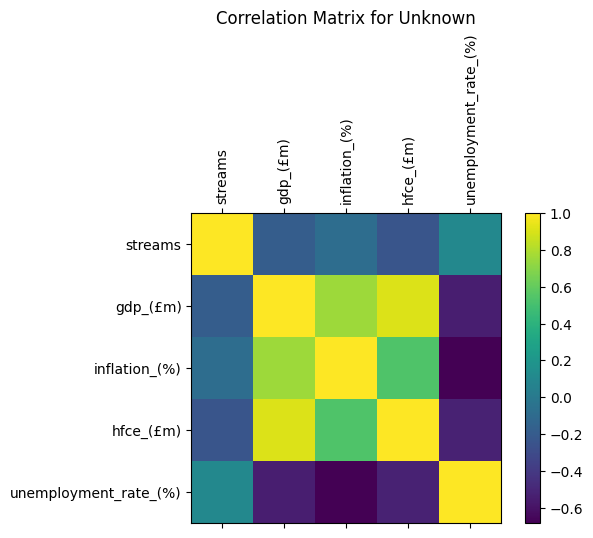

Correlation matrix for Jazz:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.175505       0.101870  -0.050063   
gdp_(£m)               0.175505  1.000000       0.646273   0.818661   
inflation_(%)          0.101870  0.646273       1.000000   0.334117   
hfce_(£m)             -0.050063  0.818661       0.334117   1.000000   
unemployment_rate_(%) -0.125457 -0.907315      -0.290881  -0.911079   

                       unemployment_rate_(%)  
streams                            -0.125457  
gdp_(£m)                           -0.907315  
inflation_(%)                      -0.290881  
hfce_(£m)                          -0.911079  
unemployment_rate_(%)               1.000000  


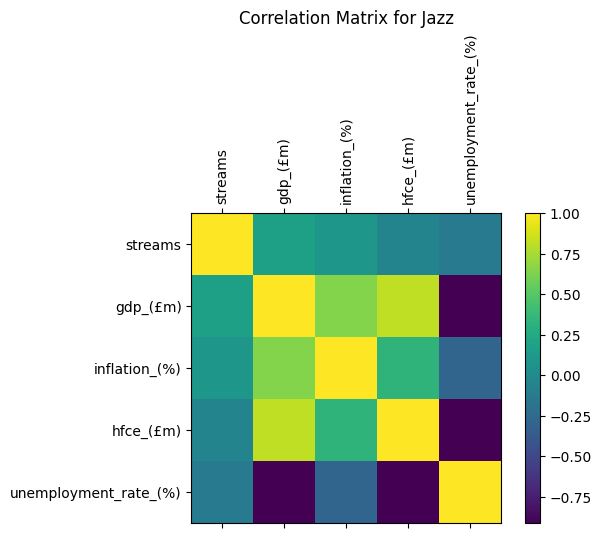

Correlation matrix for Soul:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.155161       0.117655   0.086758   
gdp_(£m)               0.155161  1.000000       0.647715   0.898103   
inflation_(%)          0.117655  0.647715       1.000000   0.411593   
hfce_(£m)              0.086758  0.898103       0.411593   1.000000   
unemployment_rate_(%) -0.081518 -0.459807      -0.377348  -0.546581   

                       unemployment_rate_(%)  
streams                            -0.081518  
gdp_(£m)                           -0.459807  
inflation_(%)                      -0.377348  
hfce_(£m)                          -0.546581  
unemployment_rate_(%)               1.000000  


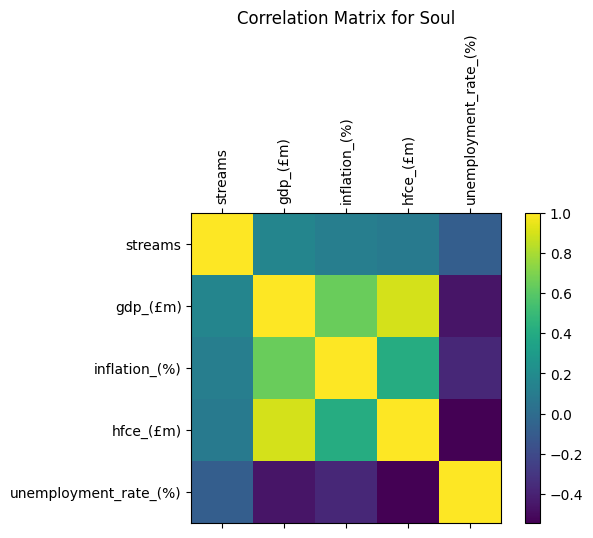

Correlation matrix for Reggae:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.172855       0.273467   0.202284   
gdp_(£m)               0.172855  1.000000       0.691372   0.996331   
inflation_(%)          0.273467  0.691372       1.000000   0.720454   
hfce_(£m)              0.202284  0.996331       0.720454   1.000000   
unemployment_rate_(%)  0.194241  0.100380       0.105349   0.141315   

                       unemployment_rate_(%)  
streams                             0.194241  
gdp_(£m)                            0.100380  
inflation_(%)                       0.105349  
hfce_(£m)                           0.141315  
unemployment_rate_(%)               1.000000  


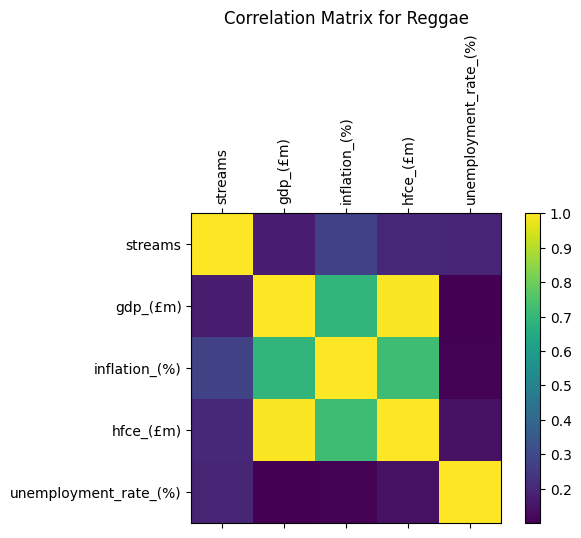

Correlation matrix for Musicals:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.240943       0.414399   0.253169   
gdp_(£m)               0.240943  1.000000       0.640199   0.973706   
inflation_(%)          0.414399  0.640199       1.000000   0.711078   
hfce_(£m)              0.253169  0.973706       0.711078   1.000000   
unemployment_rate_(%) -0.220005 -0.529914      -0.421694  -0.596772   

                       unemployment_rate_(%)  
streams                            -0.220005  
gdp_(£m)                           -0.529914  
inflation_(%)                      -0.421694  
hfce_(£m)                          -0.596772  
unemployment_rate_(%)               1.000000  


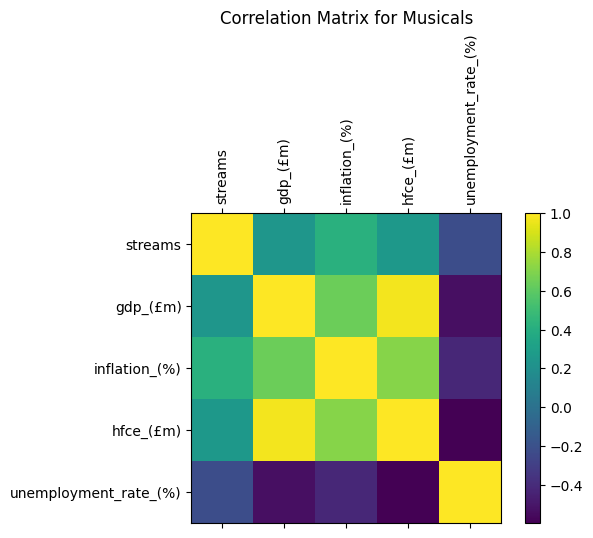

Correlation matrix for Soundtrack:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.017582      -0.049810   0.006887   
gdp_(£m)              -0.017582  1.000000       0.500649   0.950438   
inflation_(%)         -0.049810  0.500649       1.000000   0.265146   
hfce_(£m)              0.006887  0.950438       0.265146   1.000000   
unemployment_rate_(%) -0.022957 -0.282800      -0.198530  -0.184297   

                       unemployment_rate_(%)  
streams                            -0.022957  
gdp_(£m)                           -0.282800  
inflation_(%)                      -0.198530  
hfce_(£m)                          -0.184297  
unemployment_rate_(%)               1.000000  


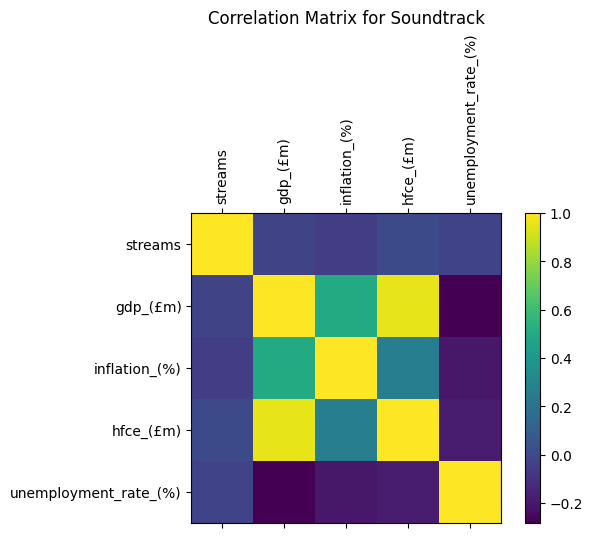

Correlation matrix for Funk:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.094277      -0.059176  -0.088160   
gdp_(£m)              -0.094277  1.000000       0.879111   0.997698   
inflation_(%)         -0.059176  0.879111       1.000000   0.874420   
hfce_(£m)             -0.088160  0.997698       0.874420   1.000000   
unemployment_rate_(%) -0.012265 -0.008670       0.056421   0.011260   

                       unemployment_rate_(%)  
streams                            -0.012265  
gdp_(£m)                           -0.008670  
inflation_(%)                       0.056421  
hfce_(£m)                           0.011260  
unemployment_rate_(%)               1.000000  


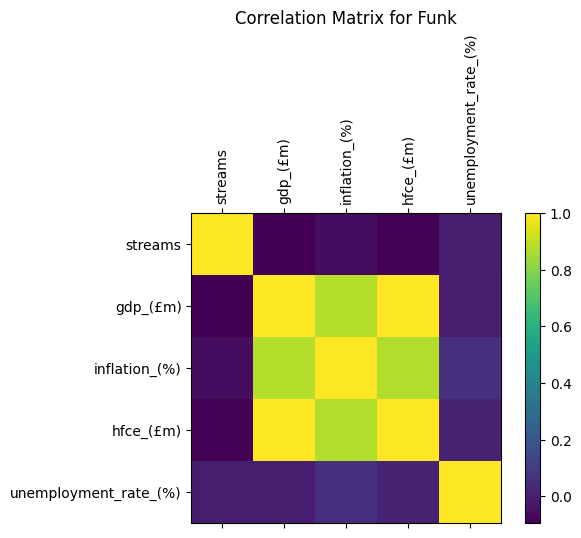

Correlation matrix for Folk:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.122224      -0.154076   0.115439   
gdp_(£m)               0.122224  1.000000       0.622030   0.956337   
inflation_(%)         -0.154076  0.622030       1.000000   0.588749   
hfce_(£m)              0.115439  0.956337       0.588749   1.000000   
unemployment_rate_(%) -0.110366 -0.299288      -0.416898  -0.437354   

                       unemployment_rate_(%)  
streams                            -0.110366  
gdp_(£m)                           -0.299288  
inflation_(%)                      -0.416898  
hfce_(£m)                          -0.437354  
unemployment_rate_(%)               1.000000  


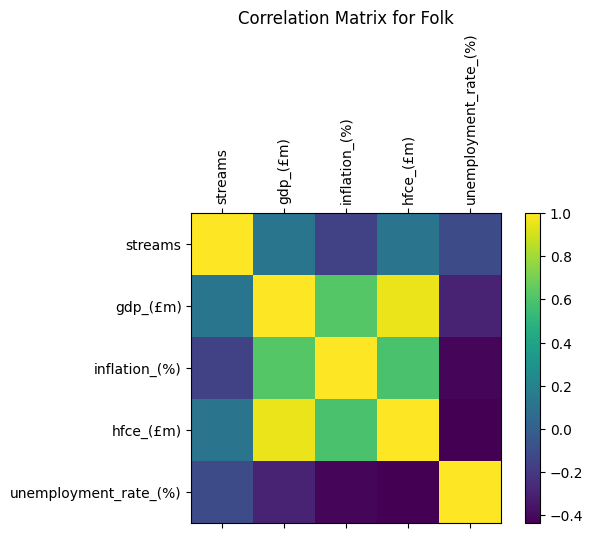

Correlation matrix for Latin:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.090421       0.113863   0.096563   
gdp_(£m)               0.090421  1.000000       0.677445   0.962887   
inflation_(%)          0.113863  0.677445       1.000000   0.738651   
hfce_(£m)              0.096563  0.962887       0.738651   1.000000   
unemployment_rate_(%) -0.068272 -0.361393      -0.397572  -0.501274   

                       unemployment_rate_(%)  
streams                            -0.068272  
gdp_(£m)                           -0.361393  
inflation_(%)                      -0.397572  
hfce_(£m)                          -0.501274  
unemployment_rate_(%)               1.000000  


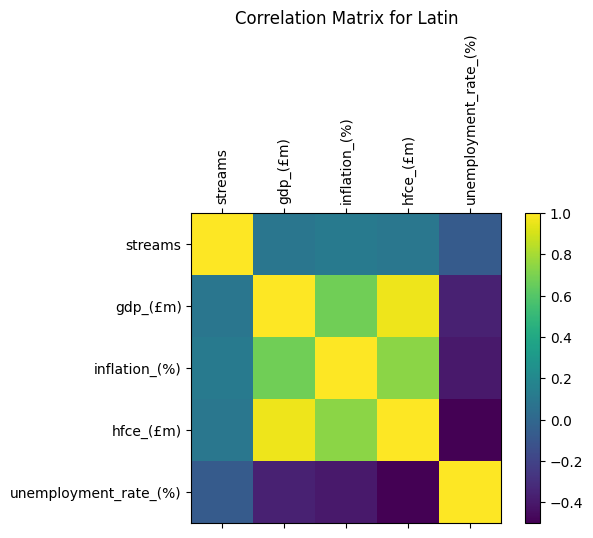

Correlation matrix for Chill:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.058384      -0.081391  -0.007948   
gdp_(£m)               0.058384  1.000000       0.738616   0.930612   
inflation_(%)         -0.081391  0.738616       1.000000   0.702995   
hfce_(£m)             -0.007948  0.930612       0.702995   1.000000   
unemployment_rate_(%)  0.317069 -0.339633      -0.727462  -0.465267   

                       unemployment_rate_(%)  
streams                             0.317069  
gdp_(£m)                           -0.339633  
inflation_(%)                      -0.727462  
hfce_(£m)                          -0.465267  
unemployment_rate_(%)               1.000000  


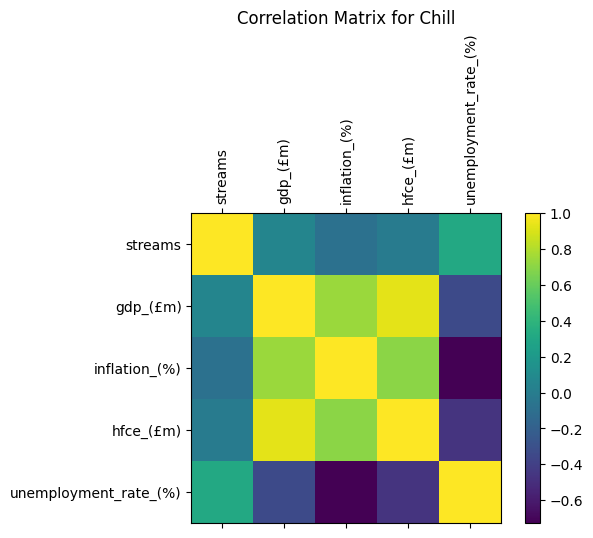

Correlation matrix for Country:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.025570      -0.239101   0.057790   
gdp_(£m)              -0.025570  1.000000       0.658607   0.935406   
inflation_(%)         -0.239101  0.658607       1.000000   0.516862   
hfce_(£m)              0.057790  0.935406       0.516862   1.000000   
unemployment_rate_(%) -0.024685 -0.481172      -0.416151  -0.628059   

                       unemployment_rate_(%)  
streams                            -0.024685  
gdp_(£m)                           -0.481172  
inflation_(%)                      -0.416151  
hfce_(£m)                          -0.628059  
unemployment_rate_(%)               1.000000  


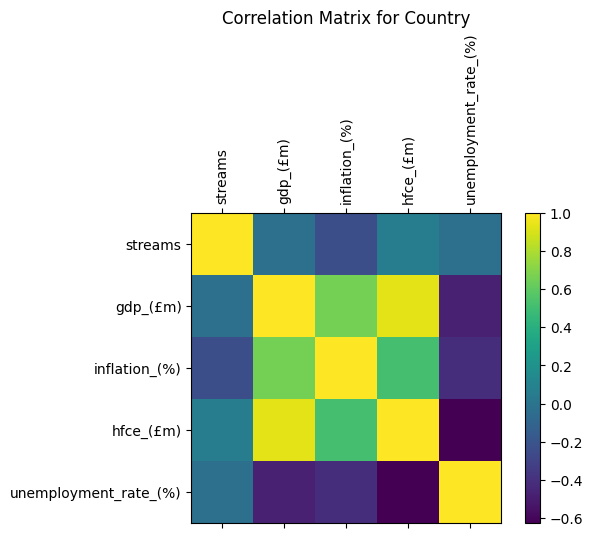

Correlation matrix for Afrobeats:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.327211       0.451656   0.340089   
gdp_(£m)               0.327211  1.000000       0.705992   0.947661   
inflation_(%)          0.451656  0.705992       1.000000   0.650876   
hfce_(£m)              0.340089  0.947661       0.650876   1.000000   
unemployment_rate_(%) -0.424322 -0.424801      -0.562278  -0.552836   

                       unemployment_rate_(%)  
streams                            -0.424322  
gdp_(£m)                           -0.424801  
inflation_(%)                      -0.562278  
hfce_(£m)                          -0.552836  
unemployment_rate_(%)               1.000000  


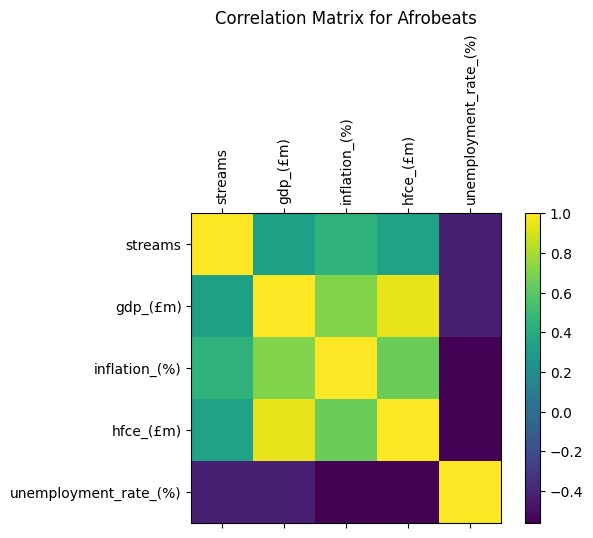

Correlation matrix for Other:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.054088       0.473182   0.460905   
gdp_(£m)              -0.054088  1.000000       0.543466   0.273510   
inflation_(%)          0.473182  0.543466       1.000000   0.718300   
hfce_(£m)              0.460905  0.273510       0.718300   1.000000   
unemployment_rate_(%) -0.195771 -0.213792      -0.481458  -0.933896   

                       unemployment_rate_(%)  
streams                            -0.195771  
gdp_(£m)                           -0.213792  
inflation_(%)                      -0.481458  
hfce_(£m)                          -0.933896  
unemployment_rate_(%)               1.000000  


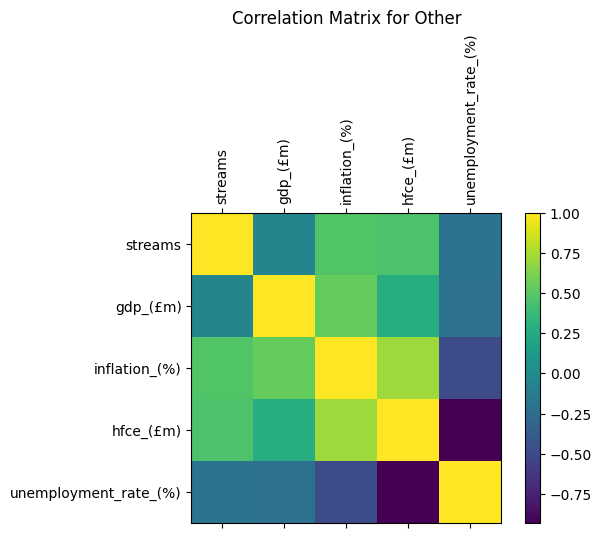

Correlation matrix for K-Pop:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000  0.094844       0.143917   0.097558   
gdp_(£m)               0.094844  1.000000       0.767244   0.954696   
inflation_(%)          0.143917  0.767244       1.000000   0.752477   
hfce_(£m)              0.097558  0.954696       0.752477   1.000000   
unemployment_rate_(%) -0.093638 -0.665652      -0.674434  -0.801343   

                       unemployment_rate_(%)  
streams                            -0.093638  
gdp_(£m)                           -0.665652  
inflation_(%)                      -0.674434  
hfce_(£m)                          -0.801343  
unemployment_rate_(%)               1.000000  


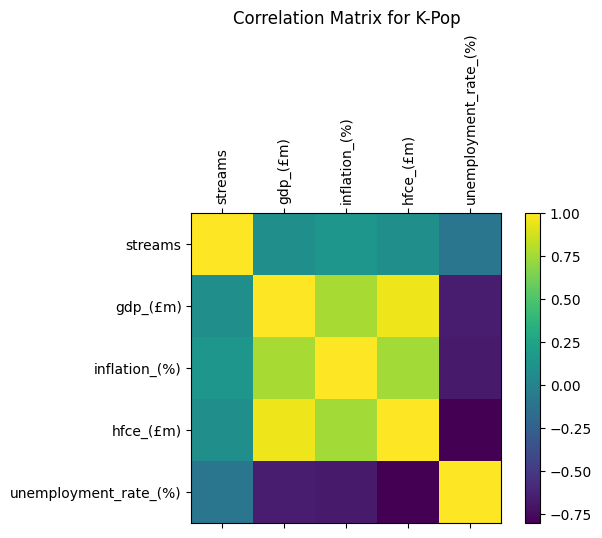

Correlation matrix for Acoustic:
                        streams  gdp_(£m)  inflation_(%)  hfce_(£m)  \
streams                1.000000 -0.442079       0.206310  -0.217577   
gdp_(£m)              -0.442079  1.000000      -0.841876   0.854850   
inflation_(%)          0.206310 -0.841876       1.000000  -0.854990   
hfce_(£m)             -0.217577  0.854850      -0.854990   1.000000   
unemployment_rate_(%)  0.148163 -0.754570       0.979861  -0.807391   

                       unemployment_rate_(%)  
streams                             0.148163  
gdp_(£m)                           -0.754570  
inflation_(%)                       0.979861  
hfce_(£m)                          -0.807391  
unemployment_rate_(%)               1.000000  


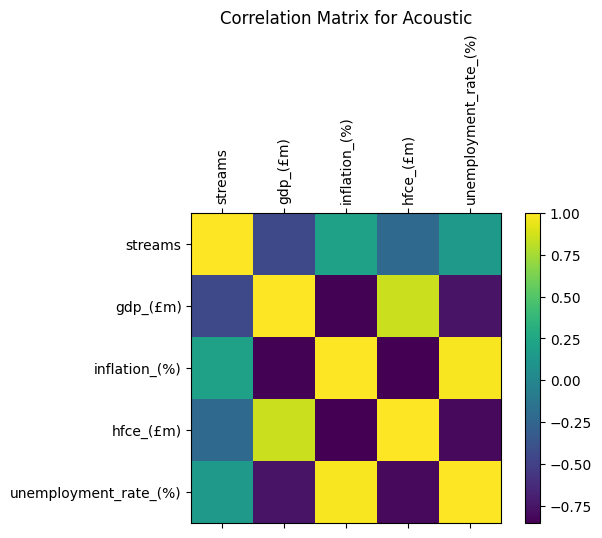

In [17]:
# List of unique genres
genres = spotify_data['Genre_Group'].unique()

# Function to calculate and plot correlation matrix for a given genre -> run for each genre
def plot_correlation_matrix(genre):
    # Filter to the specific Genre_Group
    spotify_data_genre = spotify_data[spotify_data['Genre_Group'] == genre]
    
    # Drop non-numeric columns to avoid conversion errors
    spotify_numeric_genre = spotify_data_genre.drop(columns=['year_quarter', 'Genre_Group']) 
    
    # Calculate the correlation matrix
    correlation_matrix_genre = spotify_numeric_genre.corr()
    
    # Print the correlation matrix
    print(f"Correlation matrix for {genre}:")
    print(correlation_matrix_genre)
    
    # Plot the correlation matrix
    plt.figure(figsize=(6, 4))
    plt.matshow(correlation_matrix_genre, fignum=1)
    plt.xticks(range(len(correlation_matrix_genre.columns)), correlation_matrix_genre.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix_genre.columns)), correlation_matrix_genre.columns)
    plt.colorbar()
    plt.title(f"Correlation Matrix for {genre}")
    plt.show()

# Calculate and plot correlation matrix for each genre
for genre in genres:
    plot_correlation_matrix(genre)


As there is no general correlation between Spotify genres and economic measures, it is hard to establish causation as we are not accounting for additional impact factors, like e.g. seasonality, listener’s mood, etc in this analysis. As an example, we see that Christmas music correlates positively with GDP and inflation. However, this is likely due to a seasonality factor as GDP tends to increase in Q4 of most years and Christmas music is almost exclusively listened to in Q4 of each year as well. 